In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import matplotlib.pyplot as plt
from pprint import pprint
sb.set()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
d1 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Table2.1')
d2 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Figure2.6')
d3 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Figure2.7')

In [4]:
print(d1.shape)
data=d1.rename(columns={'Country name':'Country', 
                      'Life Ladder':'Happiness',
                      'Log GDP per capita':'LogGDP',
                      'Healthy life expectancy at birth':'Life_expectancy',
                      'Freedom to make life choices': 'Freedom',
                      'Positive affect':'Pos_affect',
                      'Negative affect':'Neg_affect',
                      'GINI index (World Bank estimate)':'GINI',
                      'GINI index (World Bank estimate), average 2000-16':'GINI_average',
                      'gini of household income reported in Gallup, by wp5-year':'GINI_householdincome',
                       })
data = data.iloc[:,0:20]
data = data.drop(['GINI','GINI_average', 'Most people can be trusted, Gallup'], axis=1)
data.head()

(1704, 26)


,Country,Year,Happiness,LogGDP,Social support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,Pos_affect,Neg_affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI_householdincome
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.344540


In [5]:
for i in range(5, 19):
    new = str(i)
    if i<10:
        new = str(0) + str(i)
    dfname = 'WHR' + new
    print(dfname + " = data.loc[(data['Year'] == " + str(i+2000) + ')].reset_index(drop=True)')

WHR05 = data.loc[(data['Year'] == 2005)].reset_index(drop=True)
WHR06 = data.loc[(data['Year'] == 2006)].reset_index(drop=True)
WHR07 = data.loc[(data['Year'] == 2007)].reset_index(drop=True)
WHR08 = data.loc[(data['Year'] == 2008)].reset_index(drop=True)
WHR09 = data.loc[(data['Year'] == 2009)].reset_index(drop=True)
WHR10 = data.loc[(data['Year'] == 2010)].reset_index(drop=True)
WHR11 = data.loc[(data['Year'] == 2011)].reset_index(drop=True)
WHR12 = data.loc[(data['Year'] == 2012)].reset_index(drop=True)
WHR13 = data.loc[(data['Year'] == 2013)].reset_index(drop=True)
WHR14 = data.loc[(data['Year'] == 2014)].reset_index(drop=True)
WHR15 = data.loc[(data['Year'] == 2015)].reset_index(drop=True)
WHR16 = data.loc[(data['Year'] == 2016)].reset_index(drop=True)
WHR17 = data.loc[(data['Year'] == 2017)].reset_index(drop=True)
WHR18 = data.loc[(data['Year'] == 2018)].reset_index(drop=True)


In [6]:
WHR05 = data.loc[(data['Year'] == 2005)].reset_index(drop=True)
WHR06 = data.loc[(data['Year'] == 2006)].reset_index(drop=True)
WHR07 = data.loc[(data['Year'] == 2007)].reset_index(drop=True)
WHR08 = data.loc[(data['Year'] == 2008)].reset_index(drop=True)
WHR09 = data.loc[(data['Year'] == 2009)].reset_index(drop=True)
WHR10 = data.loc[(data['Year'] == 2010)].reset_index(drop=True)
WHR11 = data.loc[(data['Year'] == 2011)].reset_index(drop=True)
WHR12 = data.loc[(data['Year'] == 2012)].reset_index(drop=True)
WHR13 = data.loc[(data['Year'] == 2013)].reset_index(drop=True)
WHR14 = data.loc[(data['Year'] == 2014)].reset_index(drop=True)
WHR15 = data.loc[(data['Year'] == 2015)].reset_index(drop=True)
WHR16 = data.loc[(data['Year'] == 2016)].reset_index(drop=True)
WHR17 = data.loc[(data['Year'] == 2017)].reset_index(drop=True)
WHR18 = data.loc[(data['Year'] == 2018)].reset_index(drop=True)

In [7]:
print(WHR09.shape)

(114, 17)


In [8]:
WHR09.head()

,Country,Year,Happiness,LogGDP,Social support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,Pos_affect,Neg_affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI_householdincome
0,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.441906
1,Albania,2009,5.485470,9.161638,0.833047,66.199997,0.525223,-0.160855,0.863665,0.640024,0.279257,NaN,0.048114,-0.264635,1.919640,0.349950,0.617361
2,Argentina,2009,6.424133,9.750825,0.918693,67.180000,0.636646,-0.125714,0.884742,0.863786,0.236901,0.273822,0.023821,-0.570944,2.067742,0.321871,0.368422
3,Armenia,2009,4.177582,8.784616,0.680007,65.099998,0.441413,-0.199945,0.881887,0.542872,0.411280,0.373952,-0.324350,-0.207272,2.179482,0.521709,0.427577
4,Azerbaijan,2009,4.573725,9.641726,0.735970,63.020000,0.498138,-0.106351,0.753850,0.543640,0.233942,0.774252,-0.767848,-0.758656,1.893334,0.413959,0.331236


## GINI_householdincome only available starting from WHR09

In [9]:
Country_id = {}

data['Country'] = data['Country'].astype('category')
countryno = 0
for i in range(1703):
    if (data['Country'][i] != data['Country'][i+1]):
#         print(str(countryno) + '\t' + data['Country'][i] + '\t')
        Country_id[countryno] = data['Country'][i]
        countryno+=1

In [10]:
data.columns

Index(['Country', 'Year', 'Happiness', 'LogGDP', 'Social support',
       'Life_expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption',
       'Pos_affect', 'Neg_affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI_householdincome'],
      dtype='object')

Intercept of Regression 	: b =  [4.27798523]
Coefficients of Regression 	: a =  [[ 1.04988065e-01  2.37138374e-01 -1.10554096e-03  2.18111045e-01
   3.59495089e-01 -9.42686129e-01  7.20931832e-01  5.95237858e-01
  -3.11959661e-01  1.28454209e-02  9.27143711e-02  1.84155598e+00
  -9.28898121e+00  4.92399389e-02]]

                                           Predictors  Coefficients
0                                              LogGDP      0.104988
1                                      Social support      0.237138
2                                     Life_expectancy     -0.001106
3                                             Freedom      0.218111
4                                          Generosity      0.359495
5                           Perceptions of corruption     -0.942686
6                                          Pos_affect      0.720932
7                                          Neg_affect      0.595238
8                   Confidence in national government     -0.311960
9    

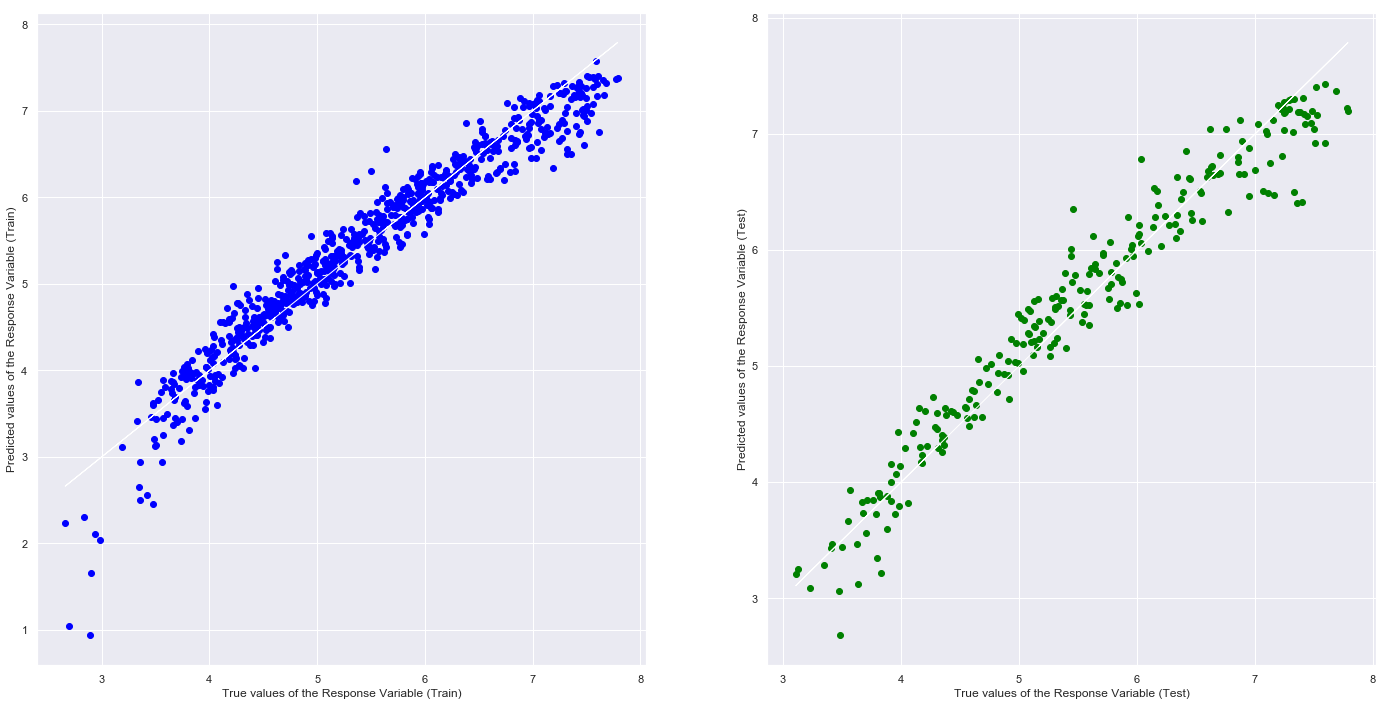

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9399068077172809
Mean Squared Error (MSE) 	: 0.07845636063304111

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9470508269374233
Mean Squared Error (MSE) 	: 0.07678213419374093



In [11]:
data = data.dropna()
# Extract Response and Predictors
y = pd.DataFrame(data["Happiness"])
X = pd.DataFrame(data[['LogGDP', 'Social support',
                       'Life_expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption',
                       'Pos_affect', 'Neg_affect', 'Confidence in national government',
                       'Democratic Quality', 'Delivery Quality',
                       'Standard deviation of ladder by country-year',
                       'Standard deviation/Mean of ladder by country-year',
                       'GINI_householdincome']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [-2.44341852]
Coefficients of Regression 	: a =  [[0.27556333 2.8629002  0.04779694]]

        Predictors  Coefficients
0           LogGDP      0.275563
1   Social support      2.862900
2  Life_expectancy      0.047797



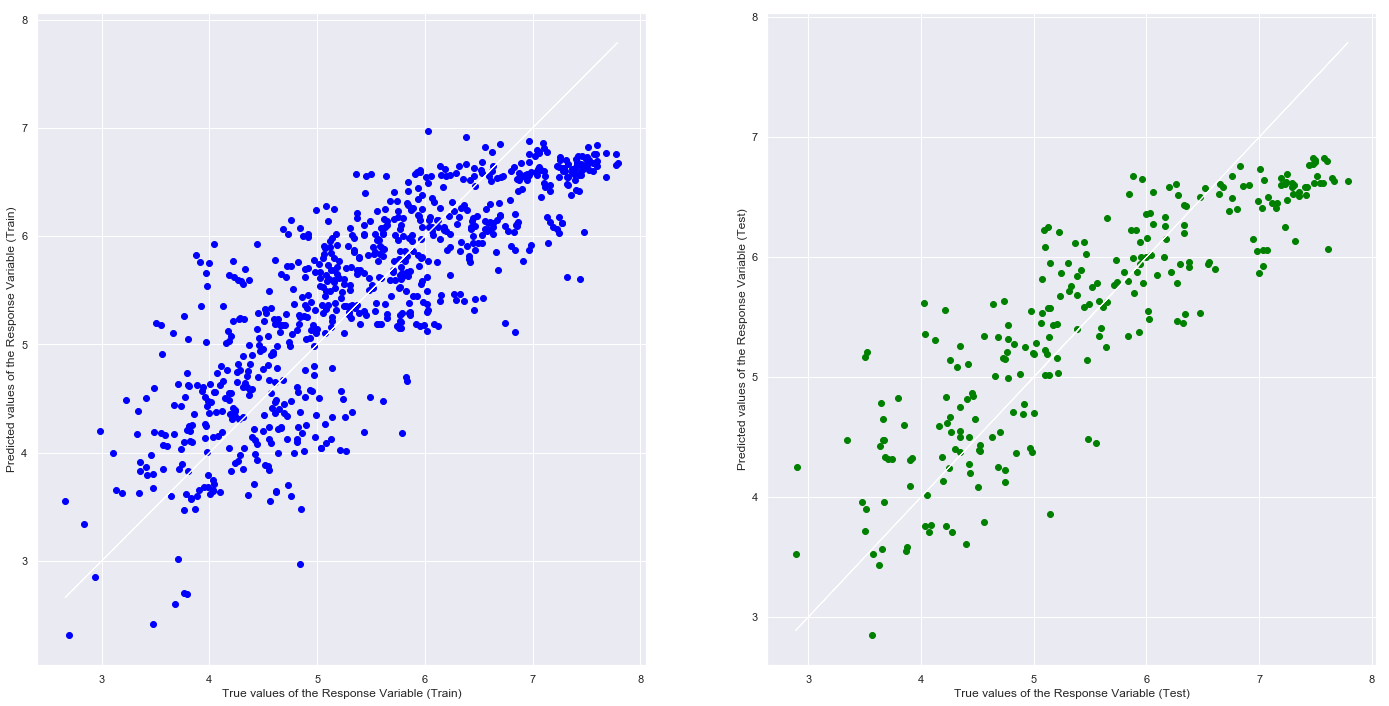

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6716390809906894
Mean Squared Error (MSE) 	: 0.4290575388899727

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7427465994476241
Mean Squared Error (MSE) 	: 0.37360146576828324



In [12]:
# Extract Response and Predictors
predictors = ['LogGDP', 'Social support', 'Life_expectancy']

y = pd.DataFrame(data["Happiness"])
X = pd.DataFrame(data[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [13]:
Stocks = pd.read_csv('Data\Stocks\S&P 500 (^GSPC)_2005to2018_daily.csv')

In [14]:
Stocks["Average"] = (Stocks["High"] + Stocks["Low"])/2
Stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average
0,31/12/2004,1213.550049,1217.329956,1211.650024,1211.920044,1211.920044,786900000,1214.489990
1,3/1/2005,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000,1209.059998
2,4/1/2005,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,1195.614990
3,5/1/2005,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,1188.224976
4,6/1/2005,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,1187.450012


In [15]:
for i in range(2005, 2019):
    print('Stocks' + str(i) + " = Stocks.loc[(Stocks['Date'].str.contains('" + str(i) + "'))]\nStocks"
          + str(i) + "['Log10_volume'] = np.log10(Stocks" + str(i) + "['Volume'])\nStocks"
          + str(i) + ' = Stocks' + str(i) + ".drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)\ntemp = Stocks"
          + str(i) + "['Log10_volume'].sum()\nStocks"
          + str(i) + ' = Stocks' + str(i) + ".describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])\nStocks"
          + str(i) + ' = Stocks' + str(i) + ".append([0]).rename(index={'mean':'" + str(i) +"'})\nStocks"
          + str(i) + "['Log10_volume'] = temp\nStocks"
          + str(i) + ' = Stocks' + str(i) + '.drop(0, axis=1).drop(0, axis=0)\nStocks'
          + str(i) + "\n")

Stocks2005 = Stocks.loc[(Stocks['Date'].str.contains('2005'))]
Stocks2005['Log10_volume'] = np.log10(Stocks2005['Volume'])
Stocks2005 = Stocks2005.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2005['Log10_volume'].sum()
Stocks2005 = Stocks2005.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2005 = Stocks2005.append([0]).rename(index={'mean':'2005'})
Stocks2005['Log10_volume'] = temp
Stocks2005 = Stocks2005.drop(0, axis=1).drop(0, axis=0)
Stocks2005

Stocks2006 = Stocks.loc[(Stocks['Date'].str.contains('2006'))]
Stocks2006['Log10_volume'] = np.log10(Stocks2006['Volume'])
Stocks2006 = Stocks2006.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2006['Log10_volume'].sum()
Stocks2006 = Stocks2006.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2006 = Stocks2006.append([0]).rename(index={'mean':'2006'})
Stocks2006['Log10_volume'] = temp
Stocks2006 = Stocks2006.drop(0, axis=1).drop(0, ax

In [16]:
Stocks2005 = Stocks.loc[(Stocks['Date'].str.contains('2005'))]
Stocks2005['Log10_volume'] = np.log10(Stocks2005['Volume'])
Stocks2005 = Stocks2005.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2005['Log10_volume'].sum()
Stocks2005 = Stocks2005.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2005 = Stocks2005.append([0]).rename(index={'mean':'2005'})
Stocks2005['Log10_volume'] = temp
Stocks2005 = Stocks2005.drop(0, axis=1).drop(0, axis=0)
Stocks2005

Stocks2006 = Stocks.loc[(Stocks['Date'].str.contains('2006'))]
Stocks2006['Log10_volume'] = np.log10(Stocks2006['Volume'])
Stocks2006 = Stocks2006.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2006['Log10_volume'].sum()
Stocks2006 = Stocks2006.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2006 = Stocks2006.append([0]).rename(index={'mean':'2006'})
Stocks2006['Log10_volume'] = temp
Stocks2006 = Stocks2006.drop(0, axis=1).drop(0, axis=0)
Stocks2006

Stocks2007 = Stocks.loc[(Stocks['Date'].str.contains('2007'))]
Stocks2007['Log10_volume'] = np.log10(Stocks2007['Volume'])
Stocks2007 = Stocks2007.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2007['Log10_volume'].sum()
Stocks2007 = Stocks2007.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2007 = Stocks2007.append([0]).rename(index={'mean':'2007'})
Stocks2007['Log10_volume'] = temp
Stocks2007 = Stocks2007.drop(0, axis=1).drop(0, axis=0)
Stocks2007

Stocks2008 = Stocks.loc[(Stocks['Date'].str.contains('2008'))]
Stocks2008['Log10_volume'] = np.log10(Stocks2008['Volume'])
Stocks2008 = Stocks2008.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2008['Log10_volume'].sum()
Stocks2008 = Stocks2008.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2008 = Stocks2008.append([0]).rename(index={'mean':'2008'})
Stocks2008['Log10_volume'] = temp
Stocks2008 = Stocks2008.drop(0, axis=1).drop(0, axis=0)
Stocks2008

Stocks2009 = Stocks.loc[(Stocks['Date'].str.contains('2009'))]
Stocks2009['Log10_volume'] = np.log10(Stocks2009['Volume'])
Stocks2009 = Stocks2009.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2009['Log10_volume'].sum()
Stocks2009 = Stocks2009.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2009 = Stocks2009.append([0]).rename(index={'mean':'2009'})
Stocks2009['Log10_volume'] = temp
Stocks2009 = Stocks2009.drop(0, axis=1).drop(0, axis=0)
Stocks2009

Stocks2010 = Stocks.loc[(Stocks['Date'].str.contains('2010'))]
Stocks2010['Log10_volume'] = np.log10(Stocks2010['Volume'])
Stocks2010 = Stocks2010.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2010['Log10_volume'].sum()
Stocks2010 = Stocks2010.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2010 = Stocks2010.append([0]).rename(index={'mean':'2010'})
Stocks2010['Log10_volume'] = temp
Stocks2010 = Stocks2010.drop(0, axis=1).drop(0, axis=0)
Stocks2010

Stocks2011 = Stocks.loc[(Stocks['Date'].str.contains('2011'))]
Stocks2011['Log10_volume'] = np.log10(Stocks2011['Volume'])
Stocks2011 = Stocks2011.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2011['Log10_volume'].sum()
Stocks2011 = Stocks2011.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2011 = Stocks2011.append([0]).rename(index={'mean':'2011'})
Stocks2011['Log10_volume'] = temp
Stocks2011 = Stocks2011.drop(0, axis=1).drop(0, axis=0)
Stocks2011

Stocks2012 = Stocks.loc[(Stocks['Date'].str.contains('2012'))]
Stocks2012['Log10_volume'] = np.log10(Stocks2012['Volume'])
Stocks2012 = Stocks2012.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2012['Log10_volume'].sum()
Stocks2012 = Stocks2012.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2012 = Stocks2012.append([0]).rename(index={'mean':'2012'})
Stocks2012['Log10_volume'] = temp
Stocks2012 = Stocks2012.drop(0, axis=1).drop(0, axis=0)
Stocks2012

Stocks2013 = Stocks.loc[(Stocks['Date'].str.contains('2013'))]
Stocks2013['Log10_volume'] = np.log10(Stocks2013['Volume'])
Stocks2013 = Stocks2013.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2013['Log10_volume'].sum()
Stocks2013 = Stocks2013.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2013 = Stocks2013.append([0]).rename(index={'mean':'2013'})
Stocks2013['Log10_volume'] = temp
Stocks2013 = Stocks2013.drop(0, axis=1).drop(0, axis=0)
Stocks2013

Stocks2014 = Stocks.loc[(Stocks['Date'].str.contains('2014'))]
Stocks2014['Log10_volume'] = np.log10(Stocks2014['Volume'])
Stocks2014 = Stocks2014.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2014['Log10_volume'].sum()
Stocks2014 = Stocks2014.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2014 = Stocks2014.append([0]).rename(index={'mean':'2014'})
Stocks2014['Log10_volume'] = temp
Stocks2014 = Stocks2014.drop(0, axis=1).drop(0, axis=0)
Stocks2014

Stocks2015 = Stocks.loc[(Stocks['Date'].str.contains('2015'))]
Stocks2015['Log10_volume'] = np.log10(Stocks2015['Volume'])
Stocks2015 = Stocks2015.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2015['Log10_volume'].sum()
Stocks2015 = Stocks2015.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2015 = Stocks2015.append([0]).rename(index={'mean':'2015'})
Stocks2015['Log10_volume'] = temp
Stocks2015 = Stocks2015.drop(0, axis=1).drop(0, axis=0)
Stocks2015

Stocks2016 = Stocks.loc[(Stocks['Date'].str.contains('2016'))]
Stocks2016['Log10_volume'] = np.log10(Stocks2016['Volume'])
Stocks2016 = Stocks2016.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2016['Log10_volume'].sum()
Stocks2016 = Stocks2016.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2016 = Stocks2016.append([0]).rename(index={'mean':'2016'})
Stocks2016['Log10_volume'] = temp
Stocks2016 = Stocks2016.drop(0, axis=1).drop(0, axis=0)
Stocks2016

Stocks2017 = Stocks.loc[(Stocks['Date'].str.contains('2017'))]
Stocks2017['Log10_volume'] = np.log10(Stocks2017['Volume'])
Stocks2017 = Stocks2017.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2017['Log10_volume'].sum()
Stocks2017 = Stocks2017.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2017 = Stocks2017.append([0]).rename(index={'mean':'2017'})
Stocks2017['Log10_volume'] = temp
Stocks2017 = Stocks2017.drop(0, axis=1).drop(0, axis=0)
Stocks2017

Stocks2018 = Stocks.loc[(Stocks['Date'].str.contains('2018'))]
Stocks2018['Log10_volume'] = np.log10(Stocks2018['Volume'])
Stocks2018 = Stocks2018.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2018['Log10_volume'].sum()
Stocks2018 = Stocks2018.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2018 = Stocks2018.append([0]).rename(index={'mean':'2018'})
Stocks2018['Log10_volume'] = temp
Stocks2018 = Stocks2018.drop(0, axis=1).drop(0, axis=0)
Stocks2018;

C:\Users\wilso\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\wilso\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\wilso\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\wilso\Anaconda3\lib\site-packages\ipykernel_launcher.py:22

In [17]:
for i in range(2006, 2019):
    print("Stocks" + str(i) + ",")

Stocks2006,
Stocks2007,
Stocks2008,
Stocks2009,
Stocks2010,
Stocks2011,
Stocks2012,
Stocks2013,
Stocks2014,
Stocks2015,
Stocks2016,
Stocks2017,
Stocks2018,


In [18]:
stock_aggregate = Stocks2005.append([Stocks2006,
                                    Stocks2007,
                                    Stocks2008,
                                    Stocks2009,
                                    Stocks2010,
                                    Stocks2011,
                                    Stocks2012,
                                    Stocks2013,
                                    Stocks2014,
                                    Stocks2015,
                                    Stocks2016,
                                    Stocks2017,
                                    Stocks2018,])
stock_aggregate

,Open,High,Low,Close,Average,Log10_volume
2005,1207.087063,1212.572896,1202.005837,1207.229443,1207.289366,2337.654564
2006,1309.762590,1315.611637,1304.494979,1310.461236,1310.053308,2352.813144
2007,1476.958364,1485.241034,1467.946455,1477.184342,1476.593744,2384.140989
2008,1222.026956,1235.699725,1204.980832,1220.042056,1220.340279,2450.126057
2009,947.022063,956.346349,938.286864,948.046388,947.316607,2452.652220
2010,1139.369761,1146.573372,1131.280990,1139.965512,1138.927181,2430.873599
2011,1267.618211,1277.223450,1257.176747,1267.638809,1267.200099,2419.027587
2012,1378.680638,1385.845401,1371.269002,1379.354160,1378.557202,2388.513785
2013,1642.298649,1649.615712,1635.740156,1643.798968,1642.677934,2399.137974
2014,1930.754485,1938.835599,1922.292981,1931.376110,1930.564290,2398.547225


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

Using TensorFlow backend.


In [20]:
df = Stocks['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(3523, 1)


array([[1213.550049],
       [1211.920044],
       [1202.079956],
       [1188.050049],
       [1183.73999 ]])

In [21]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(2818, 1)
(755, 1)


In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.36818783],
       [0.36706452],
       [0.36028331],
       [0.35061471],
       [0.34764447]])

In [23]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.96346169],
       [0.95191856],
       [0.93648858],
       [0.91965979],
       [0.91823322]])

In [69]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

dataset_train[50-50:50, 0]
dataset_train[50, 0]

0.36355672922414695

In [70]:
x_train, y_train = create_dataset(dataset_train)
x_train[0]
x_train.shape

(2768, 50)

In [71]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]
x_test.shape

(705, 50)

In [72]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape

(2768, 50, 1)

In [73]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 96)                74112     
__________

In [75]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [76]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

In [77]:
model = load_model('stock_prediction.h5')

(705, 1)

 (705, 1)


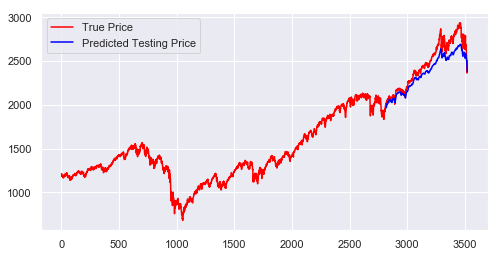

In [102]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions = scaler.inverse_transform(predictions)
print("\n", predictions.shape)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

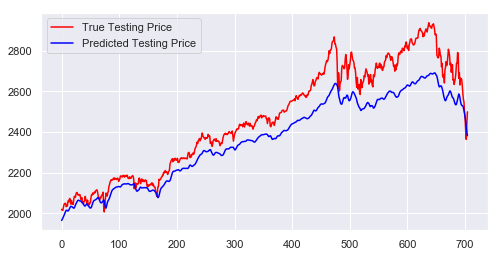

In [79]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

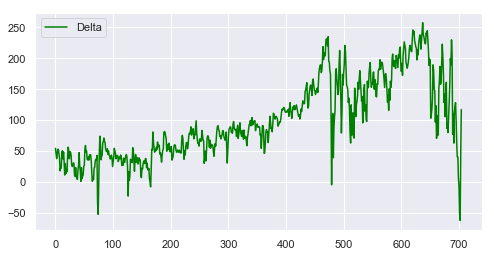

In [80]:
delta = y_test_scaled - predictions

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(delta, color='green', label='Delta')
plt.legend()

# Predicting Stock['Open'] with happiness too

In [36]:
US = data.loc[(data['Country'].str.contains('United States'))].reset_index(drop=True)
US

,Country,Year,Happiness,LogGDP,Social support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,Pos_affect,Neg_affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI_householdincome
0,United States,2009,7.158032,10.790511,0.911794,68.540001,0.830684,0.192269,0.665394,0.843484,0.261661,0.503047,0.772818,1.450143,2.021277,0.282379,0.705702
1,United States,2010,7.163616,10.807183,0.926159,68.699997,0.828044,0.235522,0.689583,0.860642,0.231053,0.418276,0.786005,1.478330,2.182074,0.304605,0.739406
2,United States,2011,7.115139,10.815644,0.921705,68.680000,0.863202,0.152239,0.696926,0.836360,0.273379,0.382532,0.859107,1.462401,1.945976,0.273498,0.612990
3,United States,2012,7.026227,10.830132,0.903192,68.660004,0.822662,0.206243,0.710034,0.833771,0.259644,0.348856,0.897015,1.467070,2.163160,0.307869,0.629069
4,United States,2013,7.249285,10.839653,0.925397,68.639999,0.792256,0.265563,0.746894,0.813678,0.260328,0.288648,0.873046,1.415544,1.938088,0.267349,0.678262
5,United States,2014,7.151114,10.857497,0.902097,68.620003,0.866077,0.212869,0.702267,0.834294,0.281265,0.348671,0.826821,1.433888,2.070654,0.289557,0.753396
6,United States,2015,6.863947,10.878154,0.903571,68.599998,0.848753,0.210956,0.697543,0.813908,0.274688,0.346936,0.893903,1.428245,1.953670,0.284628,0.649792
7,United States,2016,6.803600,10.885554,0.896751,68.500000,0.757893,0.135592,0.738920,0.805674,0.264204,0.297206,0.755765,1.491426,1.972203,0.289876,0.693315
8,United States,2017,6.991759,10.900906,0.921003,68.400002,0.868497,0.188833,0.681191,0.826555,0.268269,0.386535,0.677056,1.552135,1.880688,0.268986,0.610804


In [37]:
# US = US[['Year', 'Happiness', 'Pos_affect', 'Neg_affect']]
US = US[['Year', 'Happiness']]
US

,Year,Happiness
0,2009,7.158032
1,2010,7.163616
2,2011,7.115139
3,2012,7.026227
4,2013,7.249285
5,2014,7.151114
6,2015,6.863947
7,2016,6.803600
8,2017,6.991759


In [38]:
Stocks = Stocks.drop("Adj Close", axis=1)
Stocks.head()

,Date,Open,High,Low,Close,Volume,Average
0,31/12/2004,1213.550049,1217.329956,1211.650024,1211.920044,786900000,1214.489990
1,3/1/2005,1211.920044,1217.800049,1200.319946,1202.079956,1510800000,1209.059998
2,4/1/2005,1202.079956,1205.839966,1185.390015,1188.050049,1721000000,1195.614990
3,5/1/2005,1188.050049,1192.729980,1183.719971,1183.739990,1738900000,1188.224976
4,6/1/2005,1183.739990,1191.630005,1183.270020,1187.890015,1569100000,1187.450012


In [39]:
# df_happy = Stocks[['Open','High']].values
# df_happy = df_happy.reshape(-1, 2)
# print(df_happy.shape)
# df_happy[:5]
input_feature = Stocks.iloc[:,[6,5]].values
input_data = input_feature
input_data

array([[1.21448999e+03, 7.86900000e+08],
       [1.20906000e+03, 1.51080000e+09],
       [1.19561499e+03, 1.72100000e+09],
       ...,
       [2.40717004e+03, 4.23399000e+09],
       [2.44352002e+03, 4.09661000e+09],
       [2.49657996e+03, 3.70262000e+09]])

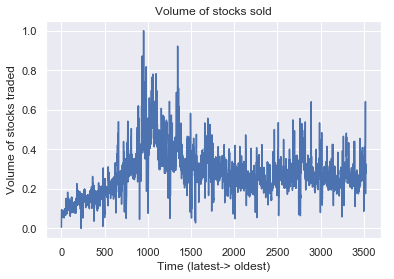

In [85]:
plt.plot(input_feature[:,1])
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

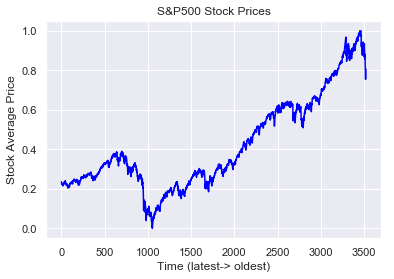

In [84]:
plt.plot(input_feature[:,0], color='blue')
plt.title("S&P500 Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Average Price")
plt.show()

In [90]:
scaler2 = MinMaxScaler(feature_range=(0,1))
scaler1 = MinMaxScaler(feature_range=(0,1))

average_data = Stocks.iloc[:,[6]].values
average_feature = average_data
average_data = scaler1.fit_transform(average_feature)

# print(average_data[:,0])
# print(input_feature[:,:])
# print(input_data[:, 0:2])
input_data[:, 0:2] = scaler2.fit_transform(input_feature[:,:])
# print(input_data[:, 0:2])

input_data

array([[0.23613214, 0.00577377],
       [0.23371996, 0.07323071],
       [0.22774724, 0.09281829],
       ...,
       [0.7659602 , 0.32699237],
       [0.78210807, 0.31419056],
       [0.80567905, 0.27747643]])

In [43]:
lookback = 50

test_size = int(.2 * len(Stocks))
X_h=[]
y_h=[]
for i in range(len(Stocks)-lookback-1):
    t_h=[]
    for j in range(0,lookback):
        t_h.append(input_data[[(i+j)], :])
        
    X_h.append(t_h)
    y_h.append(input_data[i+lookback,1])

In [44]:
X_h, y_h = np.array(X_h), np.array(y_h)

X_h = X_h.reshape(X_h.shape[0], lookback, 2)
X_train_h = X_h[:-(test_size)]
X_test_h = X_h[-(test_size):]

print(X_h.shape)
print(X_train_h.shape)
print(X_test_h.shape)

(3472, 50, 2)
(2768, 50, 2)
(704, 50, 2)


In [93]:
y_train_h = y_h[:-(test_size)]
y_test_h = y_h[-(test_size):]
print(y_train_h.shape)
print(y_test_h.shape)
print(y_test, "\n\n\n")
print(y_test_h)

(2768,)
(704,)
[0.92344317 0.92068661 0.91997677 0.92870133 0.9385285  0.94315951
 0.94368318 0.94362127 0.93254671 0.93627499 0.93480022 0.9503197
 0.95410998 0.94918269 0.96060165 0.95323476 0.94156074 0.95358623
 0.94154694 0.94477898 0.94029266 0.95559157 0.96728629 0.96743115
 0.9644885  0.9763555  0.98012509 0.98051795 0.97321298 0.97175208
 0.97207596 0.97379192 0.97282702 0.95965761 0.956453   0.96335132
 0.95171868 0.94665342 0.94308372 0.94982354 0.95332427 0.96756205
 0.956453   0.95323476 0.94222919 0.95498521 0.94074751 0.94063033
 0.93902466 0.94615726 0.94644665 0.96455731 0.97317849 0.97222755
 0.97916709 0.97490134 0.97749942 0.98188243 0.97964962 0.986093
 0.98783655 0.98986258 0.98567271 0.97339216 0.96298605 0.96364087
 0.95589492 0.96405425 0.96224879 0.96887135 0.97201388 0.97411579
 0.98170325 0.93183687 0.91476    0.93958282 0.96058785 0.97862281
 0.97566636 0.96834759 0.97936697 0.98388088 1.00093714 1.00629868
 1.01616034 1.01896503 1.02396131 1.02183197 1.023

In [46]:
model_happy = Sequential()
model_happy.add(LSTM(units=96, return_sequences=True, input_shape=(X_h.shape[1], 2)))
model_happy.add(Dropout(0.2))
model_happy.add(LSTM(units=96, return_sequences=True))
model_happy.add(Dropout(0.2))
model_happy.add(LSTM(units=96, return_sequences=True))
model_happy.add(Dropout(0.2))
model_happy.add(LSTM(units=96))
model_happy.add(Dropout(0.2))
model_happy.add(Dense(units=1))

In [47]:
model_happy.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50, 96)            38016     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 96)                74112     
__________

In [48]:
model_happy.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
if(not os.path.exists('stock_prediction_happy.h5')):
    model_happy.fit(X_train_h, y_train_h, epochs=50, batch_size=32)
    model_happy.save('stock_prediction_happy.h5')

Epoch 1/50
2768/2768 [==============================] - 10s 3ms/step - loss: 0.0109
Epoch 2/50
2768/2768 [==============================] - 10s 4ms/step - loss: 0.0065
Epoch 3/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0061
Epoch 4/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0061
Epoch 5/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0060
Epoch 6/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0056
Epoch 7/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0054
Epoch 8/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0054
Epoch 9/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0053
Epoch 10/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0051
Epoch 11/50
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0047
Epoch 12/50
2768/2768 [==============================] - 11s 4ms/step - lo

(2, 5)

In [50]:
model_happy = load_model('stock_prediction_happy.h5')

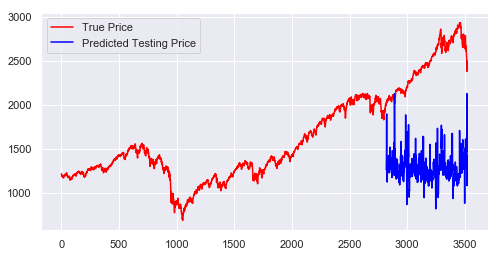

In [99]:
df2 = Stocks['Average'].values

# predictions_happy = model_happy.predict(X_test_h)
# predictions_happy = scaler1.inverse_transform(predictions_happy)
predictions_happy = scaler1.inverse_transform(y_test_h.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df2, color='red',  label="True Price")
ax.plot(range(len(y_train_h)+50,len(y_train_h)+50+len(predictions_happy)),predictions_happy, color='blue', label='Predicted Testing Price')

plt.legend()

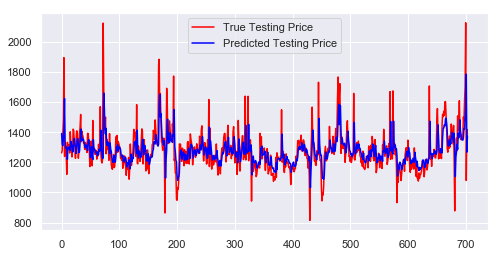

In [98]:
y_test_scaled_happy = scaler1.inverse_transform(y_test_h.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled_happy, color='red', label='True Testing Price')
plt.plot(predictions_happy, color='blue', label='Predicted Testing Price')
plt.legend()

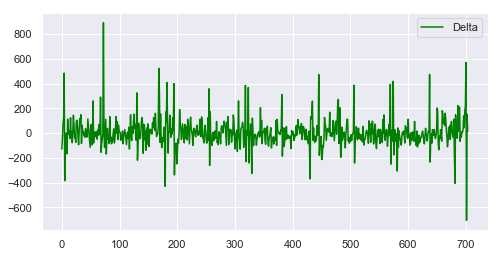

In [55]:
delta_happy = y_test_scaled_happy - predictions_happy

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(delta_happy, color='green', label='Delta')
plt.legend()